In [1]:
import json
import os
import torch
import matplotlib.pyplot as plt

In [2]:
CONTENT_PATH = "/home/xianglin/projects/DVI_data/resnet18_mnist"
VIS_MODELS = ['inAE', 'bnAE', 'gnAE', 'cnAE']
VIS_METHOD = "tDVI"
k = 15

In [3]:
with open(os.path.join(CONTENT_PATH, "config.json"), "r") as f:
    config = json.load(f)
config = config[VIS_METHOD]

SETTING = config["SETTING"]
EPOCH_START = config["EPOCH_START"]
EPOCH_END = config["EPOCH_END"]
EPOCH_PERIOD = config["EPOCH_PERIOD"]

In [4]:
nn_train_lines = dict()
nn_test_lines = dict()
ppr_train_lines = dict()
ppr_test_lines = dict()

selected_epochs = list(range(EPOCH_START, EPOCH_END+EPOCH_PERIOD, EPOCH_PERIOD))
for vmodel in VIS_MODELS:
    evaluation_file = os.path.join(CONTENT_PATH, "Model", f'evaluation_{VIS_METHOD}_{vmodel}.json')
    with open(evaluation_file, "r") as f:
        eval = json.load(f)
    nn_train = list()
    nn_test = list()
    ppr_train = list()
    ppr_test = list()
    for epoch in selected_epochs:
        nn_train.append(round(eval["nn_train"][str(epoch)][str(k)], 3))
        nn_test.append(round(eval["nn_test"][str(epoch)][str(k)], 3))
        ppr_train.append(round(eval["ppr_train"][str(epoch)], 3))
        ppr_test.append(round(eval["ppr_test"][str(epoch)], 3))
    nn_train_lines[vmodel] = nn_train
    nn_test_lines[vmodel] = nn_test
    ppr_train_lines[vmodel] = ppr_train
    ppr_test_lines[vmodel] = ppr_test

# nn

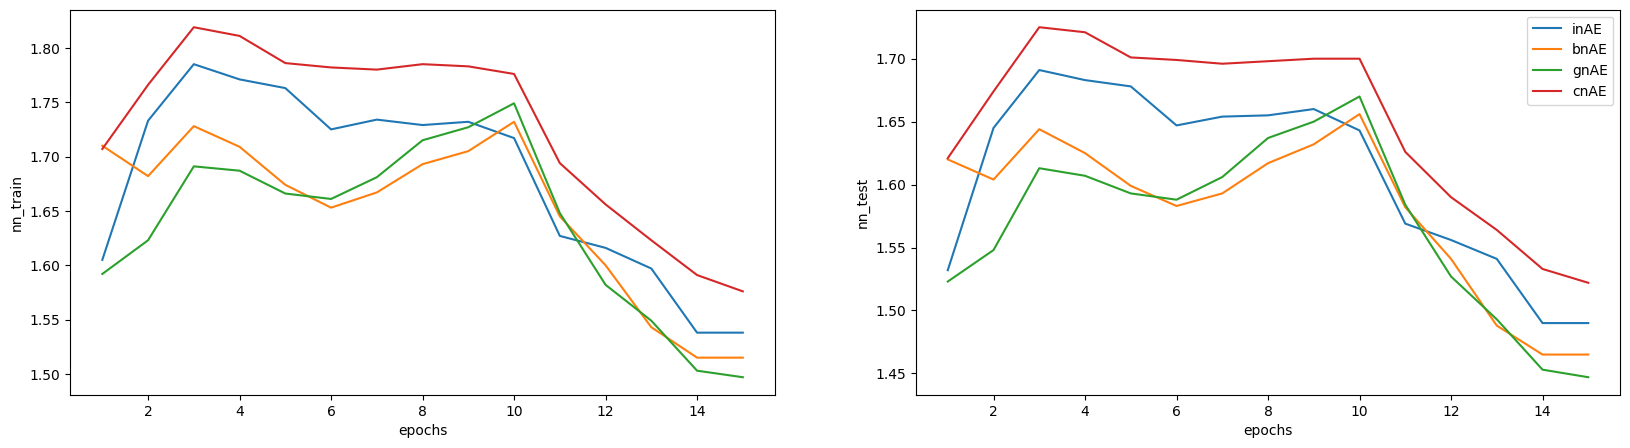

In [5]:
# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Create line plot for each line
for vmodel in VIS_MODELS:
    axs[0].plot(selected_epochs, nn_train_lines[vmodel], label=vmodel)
    axs[1].plot(selected_epochs, nn_test_lines[vmodel], label=vmodel)
# Set labels and title
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('nn_train')
# Set labels and title
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('nn_test')

# Add legend
plt.legend()
# Show the plot
plt.show()

# ppr

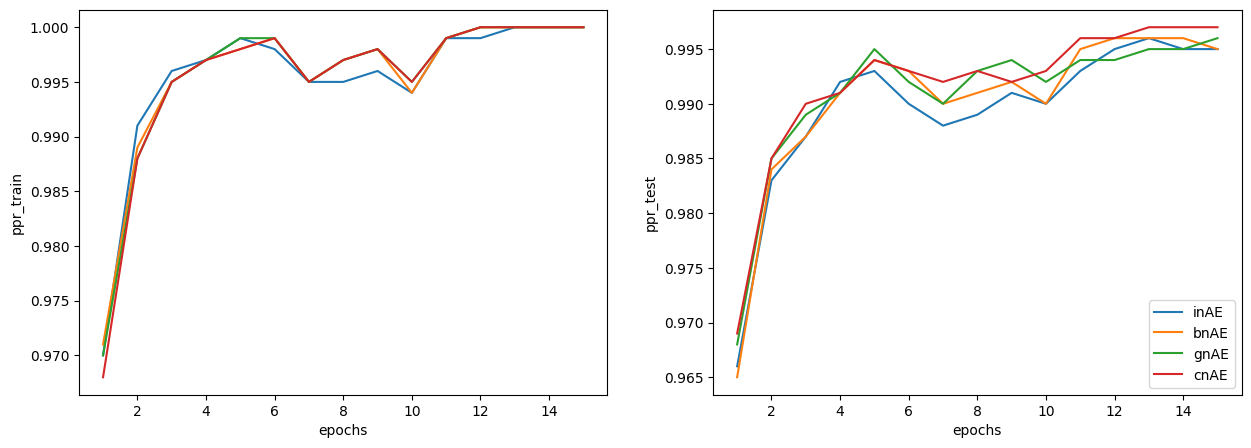

In [6]:
# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create line plot for each line
for vmodel in VIS_MODELS:
    axs[0].plot(selected_epochs, ppr_train_lines[vmodel], label=vmodel)
    axs[1].plot(selected_epochs, ppr_test_lines[vmodel], label=vmodel)
# Set labels and title
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('ppr_train')
# Set labels and title
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('ppr_test')

# Add legend
plt.legend()
# Show the plot
plt.show()

# time spent

In [7]:
time_spent_lines = dict()
num_epochs_lines = dict()
operation = "training"
selected_epochs = list(range(EPOCH_START+EPOCH_PERIOD, EPOCH_END+EPOCH_PERIOD, EPOCH_PERIOD))

for vmodel in VIS_MODELS:
    time_spent = list()
    num_epochs = list()

    time_file = os.path.join(CONTENT_PATH, "Model", f'time_{VIS_METHOD}_{vmodel}.json')
    with open(time_file, "r") as f:
        eval = json.load(f)
    eval = eval[operation]
    for epoch in selected_epochs:
        num_e, t = eval[str(epoch)]
        time_spent.append(t)
        num_epochs.append(num_e)
    time_spent_lines[vmodel] = time_spent
    num_epochs_lines[vmodel] = num_epochs

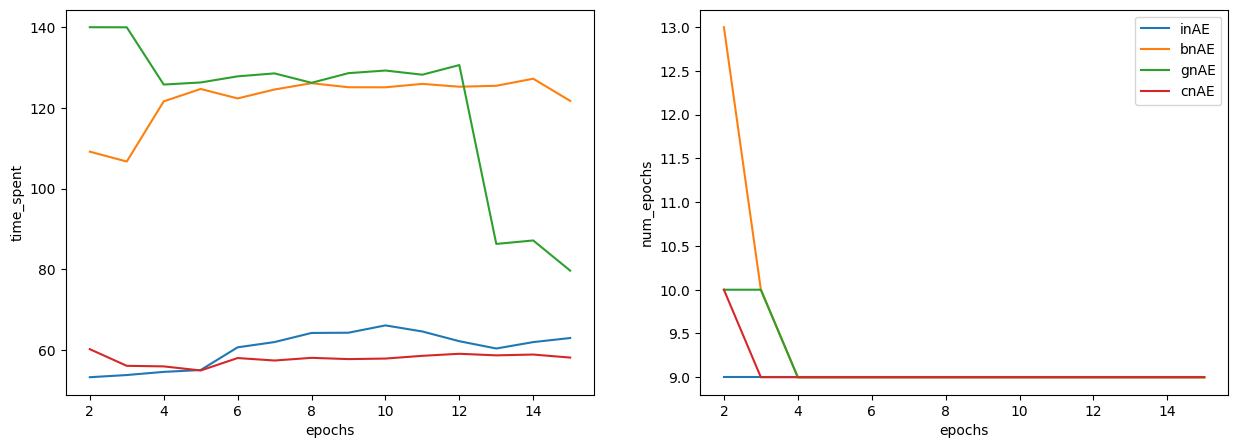

In [8]:
# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create line plot for each line
for vmodel in VIS_MODELS:
    axs[0].plot(selected_epochs, time_spent_lines[vmodel], label=vmodel)
    axs[1].plot(selected_epochs, num_epochs_lines[vmodel], label=vmodel)
# Set labels and title
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('time_spent')
# Set labels and title
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('num_epochs')

# Add legend
plt.legend()
# Show the plot
plt.show()

# loss

In [9]:
umap_lines = dict()
recon_lines = dict()
smooth_lines = dict()
selected_epochs = list(range(EPOCH_START+EPOCH_PERIOD, EPOCH_END+EPOCH_PERIOD, EPOCH_PERIOD))
for vmodel in VIS_MODELS:
    umap_lines[vmodel] = dict()
    recon_lines[vmodel] = dict()
    smooth_lines[vmodel] = dict()
    for epoch in selected_epochs:
        save_model_path = os.path.join(CONTENT_PATH, "Model", f"Epoch_{epoch}", f"{VIS_METHOD}_{vmodel}.pth")
        save_losses = torch.load(save_model_path, map_location="cpu")['loss']
        umap_lines[vmodel][str(epoch)] = save_losses['umap']
        recon_lines[vmodel][str(epoch)] = save_losses['recon']
        smooth_lines[vmodel][str(epoch)] = save_losses['smooth']

In [10]:
epoch = 2


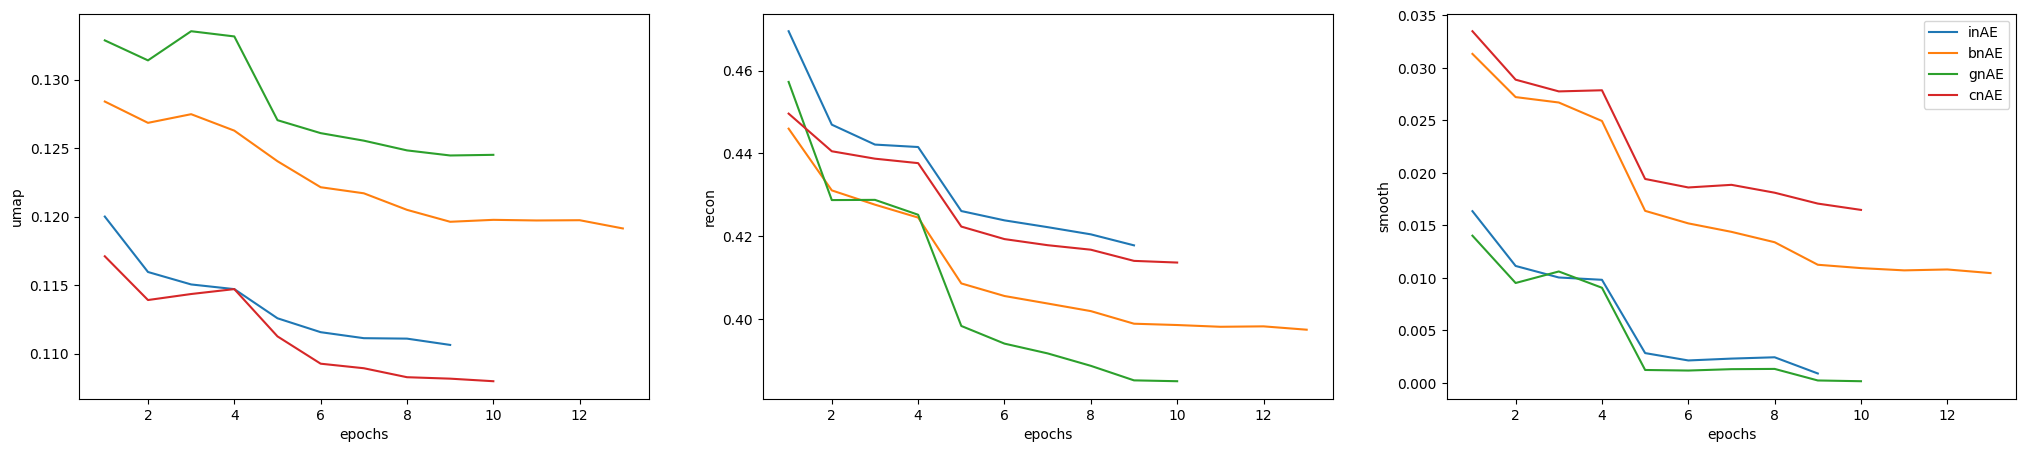

In [11]:
# Create figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
# Create line plot for each line
for vmodel in VIS_MODELS:
    axs[0].plot(list(range(1, len(umap_lines[vmodel][str(epoch)])+1)), umap_lines[vmodel][str(epoch)], label=vmodel)
    axs[1].plot(list(range(1, len(recon_lines[vmodel][str(epoch)])+1)), recon_lines[vmodel][str(epoch)], label=vmodel)
    axs[2].plot(list(range(1, len(smooth_lines[vmodel][str(epoch)])+1)), smooth_lines[vmodel][str(epoch)], label=vmodel)
# Set labels and title
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('umap')
# Set labels and title
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('recon')
# Set labels and title
axs[2].set_xlabel('epochs')
axs[2].set_ylabel('smooth')

# Add legend
plt.legend()
# Show the plot
plt.show()